In [1]:
import os
import json
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [2]:
print(os.listdir("S:\\PROJECT"))


print(len(os.listdir("S:\\PROJECT\\Datasets\\NewCropsDataset")))
print(os.listdir("S:\\PROJECT\\Datasets\\NewCropsDataset")[:32])



['Abstract', 'app', 'Code', 'CPD PH2 Sham Script.pdf', 'Datasets', 'Model', 'model.tflite', 'model_VGG16.h5', 'para', 'PPT', 'Research Papers', 'Title']
32
['Cauliflower___Bacterial_spot_rot', 'Cauliflower___Black_Rot', 'Cauliflower___Downy_Mildew', 'Cauliflower___Healthy', 'Corn___Blight', 'Corn___Common_Rust', 'Corn___Gray_Leaf_Spot', 'Corn___Healthy', 'Potato___Bacterial_Wilt', 'Potato___Blight', 'Potato___Healthy', 'Rice___Bacterial_Leaf_Blight', 'Rice___Brown_Spot', 'Rice___Healthy', 'Rice___Hispa', 'Rice___Leaf_Blast', 'Rice___Leaf_scald', 'Rice___Sheath_Blight', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Wheat___Healthy', 'Wheat___Mildew', 'Wheat___Rust', 'Wheat___Septorial']


In [3]:
print(len(os.listdir("S:\\PROJECT\\Datasets\\NewCropsDataset\\Cauliflower___Healthy")))
print(os.listdir("S:\\PROJECT\\Datasets\\NewCropsDataset\\Cauliflower___Healthy")[:5])

1595
['Disease Free. (1).jpg', 'Disease Free. (10).jpg', 'Disease Free. (1000).jpg', 'Disease Free. (1001).jpg', 'Disease Free. (1005).jpg']


In [4]:
# Dataset Path
base_dir = 'S:\\PROJECT\\Datasets\\NewCropsDataset'

(256, 256, 3)


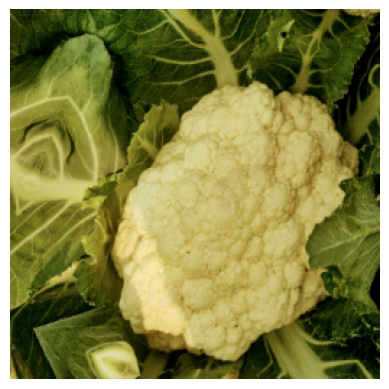

In [5]:
image_path = 'S:\\PROJECT\\Datasets\\NewCropsDataset\\Cauliflower___Healthy\\Disease Free. (1).jpg'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [6]:
image_path = 'S:\\PROJECT\\Datasets\\NewCropsDataset\\Cauliflower___Healthy\\Disease Free. (1).jpg'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[0.1254902  0.16470589 0.01568628]
  [0.14509805 0.18039216 0.01176471]
  [0.15294118 0.1882353  0.00392157]
  ...
  [0.69803923 0.64705884 0.3372549 ]
  [0.67058825 0.6039216  0.28627452]
  [0.6666667  0.59607846 0.29803923]]

 [[0.14509805 0.18431373 0.00784314]
  [0.1764706  0.21568628 0.01960784]
  [0.16862746 0.20784314 0.01960784]
  ...
  [0.627451   0.57254905 0.25882354]
  [0.5647059  0.49019608 0.18431373]
  [0.5294118  0.45882353 0.1764706 ]]

 [[0.25490198 0.28627452 0.05882353]
  [0.1882353  0.22745098 0.02352941]
  [0.14509805 0.18039216 0.00392157]
  ...
  [0.40784314 0.34117648 0.08235294]
  [0.32941177 0.28235295 0.05098039]
  [0.19215687 0.17254902 0.01568628]]

 ...

 [[0.7607843  0.72156864 0.31764707]
  [0.7176471  0.6784314  0.27058825]
  [0.7176471  0.67058825 0.29803923]
  ...
  [0.10980392 0.17254902 0.01960784]
  [0.10588235 0.16862746 0.02352941]
  [0.1254902  0.18431373 0.02745098]]

 [[0.7921569  0.7529412  0.36862746]
  [0.74509805 0.69411767 0.2901961 ]


In [7]:
# Image Parameters
img_size = 224
batch_size = 32

In [8]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [9]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 27902 images belonging to 32 classes.


In [10]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 6958 images belonging to 32 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Hyperparameter tuning parameters (consider a grid search for more thorough exploration)
learning_rates = [1e-3, 1e-4, 1e-5]
dropout_rates = [0.2, 0.3, 0.4, 0.5]
epochs_range = range(10, 25)  # Adjust based on training data size and complexity

def train_model(img_size, train_generator, validation_generator, batch_size):
    for lr in learning_rates:
        for dropout_rate in dropout_rates:
            for epochs in epochs_range:
                # Model definition
                pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
                pretrained_model.trainable = False

                model = Sequential()
                model.add(pretrained_model)
                model.add(Flatten())
                model.add(Dense(256, activation='relu'))
                model.add(Dropout(dropout_rate))  # Adjust dropout rate based on grid search
                model.add(Dense(train_generator.num_classes, activation='softmax'))

                # Compile the model
                model.compile(optimizer=Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])

                # Callbacks
                callbacks = [
                    EarlyStopping(patience=5, restore_best_weights=True),
                    ReduceLROnPlateau(factor=0.1, patience=3)
                ]

                # Training
                history = model.fit(
                    train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=epochs,  # Adjust epochs based on grid search
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size,
                    callbacks=callbacks
                )

                # Evaluate and potentially keep the best model based on validation accuracy
                # (implementation omitted for brevity)

# Example usage (assuming you have prepared your train/validation generators)
train_model(img_size=224, train_generator=train_generator, validation_generator=validation_generator, batch_size=32)




Epoch 1/10


871/871 [==============================] - 4416s 5s/step - loss: 1.5293 - accuracy: 0.5381 - val_loss: 1.3132 - val_accuracy: 0.6218 - lr: 0.0010
Epoch 2/10
871/871 [==============================] - 3899s 4s/step - loss: 0.7283 - accuracy: 0.7600 - val_loss: 1.4289 - val_accuracy: 0.6544 - lr: 0.0010
Epoch 3/10
871/871 [==============================] - 1914s 2s/step - loss: 0.5355 - accuracy: 0.8194 - val_loss: 1.3196 - val_accuracy: 0.6993 - lr: 0.0010
Epoch 4/10
871/871 [==============================] - 1882s 2s/step - loss: 0.4275 - accuracy: 0.8523 - val_loss: 1.4257 - val_accuracy: 0.7205 - lr: 0.0010
Epoch 5/10
871/871 [==============================] - 1873s 2s/step - loss: 0.2595 - accuracy: 0.9133 - val_loss: 1.3098 - val_accuracy: 0.7359 - lr: 1.0000e-04
Epoch 6/10
871/871 [==============================] - 1854s 2s/step - loss: 0.2284 - accuracy: 0.9229 - val_loss: 1.3643 - val_accuracy: 0.7357 - lr: 1.0000e-04
Epoch 7/10
871/871 [==========================

In [ ]:
model.save('S:\\PROJECT\\para\\model_VGG16.h5')

In [ ]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the predicted classes for the validation data
validation_generator.reset()
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true classes for the validation data
y_true = validation_generator.classes

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Get class labels
class_labels = list(validation_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
         

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # print(img.shape)
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis numbers
    plt.show()
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
from tensorflow.keras.utils import to_categorical

class_indices = {v: k for k, v in train_generator.class_indices.items()}

# Get the number of classes
num_classes = len(class_indices)

# Perform one-hot encoding for each class index
one_hot_encoded_labels = {class_index: to_categorical(class_index, num_classes=num_classes) for class_index in class_indices}

# Display the one-hot encoded labels
for class_index, one_hot_label in one_hot_encoded_labels.items():
    print(f"Class Index: {class_index}, One-Hot Encoded Label: {one_hot_label}")

In [ ]:
class_indices

In [ ]:
# saving the class names as json file
json.dump(class_indices, open('S:\\PROJECT\\Code\\VGG\\VGG_CPD_class_indices.json', 'w'))

In [ ]:
import csv

# Assuming you have a 'class_indices' dictionary

# Specify the file path for the CSV file
csv_file_path = 'S:\\PROJECT\\Code\\VGG\\VGG_CPD_class_indices.csv'

# Save class indices as a CSV file
with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['ClassIndex', 'ClassName'])  # Write header

    for class_index, class_name in class_indices.items():
        csv_writer.writerow([class_index, class_name])


In [ ]:
import json
from tensorflow.keras.utils import to_categorical

# Load class indices from the JSON file
with open('S:\\PROJECT\\Code\\VGG\\VGG_CPD_class_indices.json', 'r') as json_file:
    loaded_class_indices = json.load(json_file)

# Get the number of classes
num_classes = len(loaded_class_indices)

# Convert class indices to integers (if needed)
loaded_class_indices_int = {int(k): v for k, v in loaded_class_indices.items()}

# Perform one-hot encoding for each loaded class index
one_hot_encoded_labels = {class_index: to_categorical(class_index, num_classes=num_classes) for class_index in loaded_class_indices_int}

# Display the one-hot encoded labels
for class_index, one_hot_label in one_hot_encoded_labels.items():
    print(f"Class Index: {class_index}, One-Hot Encoded Label: {one_hot_label.tolist()}")


In [ ]:
# Example Usage
image_path = "S://PROJECT//Datasets//NewCropsDataset//Cauliflower___Healthy//Disease Free. (40).jpg"
# image_path = '/content/drive/MyDrive/Project/Demo Dataset/Corn___healthy/image (1).jpg'
# image_path = '/content/drive/MyDrive/Project/Demo Dataset/Corn___Northern_Leaf_Blight/image (1).JPG'

predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

# Make Prediction

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('D:\project/model_VGG16.h5')


In [36]:
import json
from tensorflow.keras.utils import to_categorical

# Load class indices from the JSON file
with open('D:\project/VGG_CPD_class_indices.json', 'r') as json_file:
    loaded_class_indices = json.load(json_file)

# Get the number of classes
num_classes = len(loaded_class_indices)

# Convert class indices to integers (if needed)
loaded_class_indices_int = {int(k): v for k, v in loaded_class_indices.items()}

# Perform one-hot encoding for each loaded class index
one_hot_encoded_labels = {class_index: to_categorical(class_index, num_classes=num_classes) for class_index in loaded_class_indices_int}

# Display the one-hot encoded labels
for class_index, one_hot_label in one_hot_encoded_labels.items():
    print(f"Class Index: {class_index}, One-Hot Encoded Label: {one_hot_label.tolist()}")


Class Index: 0, One-Hot Encoded Label: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 1, One-Hot Encoded Label: [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 2, One-Hot Encoded Label: [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 3, One-Hot Encoded Label: [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 4, One-Hot Encoded Label: [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [37]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # print(img.shape)
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis numbers
    plt.show()
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

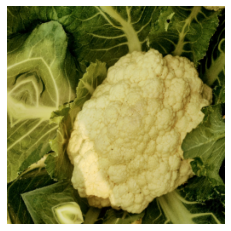

1/1 [==============================] - 1s 802ms/step
Predicted Class Name: Cauliflower___Healthy


In [38]:
# Example Usage
# image_path = '/content/drive/MyDrive/Project/NewCropsDataset/Corn___Healthy/ch12_0_134.jpg'
# image_path = '/content/drive/MyDrive/Project/NewCropsDataset/Corn___Healthy/Corn_Health (100).jpg'
image_path = "D:\\new dataset\\dataset\\Cauliflower___Healthy\\Disease Free. (1).jpg"

predicted_class_name = predict_image_class(loaded_model, image_path, loaded_class_indices_int)

# Output the result
print("Predicted Class Name:", predicted_class_name)

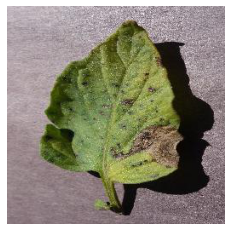

1/1 [==============================] - 0s 315ms/step
Predicted Class Name: Tomato___Early_blight


In [39]:
image_path = "D:\\new dataset\\dataset\\Tomato___Early_blight\\00e7c4b2-3005-4558-9cfa-235e356cb7a8___RS_Erly.B 7844.JPG"

predicted_class_name = predict_image_class(loaded_model, image_path, loaded_class_indices_int)

# Output the result
print("Predicted Class Name:", predicted_class_name)

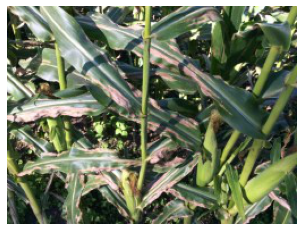

1/1 [==============================] - 0s 316ms/step
Predicted Class Name: Corn___Blight


In [40]:
image_path = "D:\project\dataset\Corn___Blight\cb1.jpeg"

predicted_class_name = predict_image_class(loaded_model, image_path, loaded_class_indices_int)

# Output the result
print("Predicted Class Name:", predicted_class_name)

# Convert Model into Tflite

In [58]:
import json
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('/content/drive/MyDrive/Project/Code/CPD_model.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model to a .tflite file
tflite_model_path = '/content/drive/MyDrive/Project/Code/converted_model.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f'TensorFlow Lite model saved to: {tflite_model_path}')

# Tflite Model Prediction

In [ ]:
# Load class indices from the JSON file
with open('/content/drive/MyDrive/Project/Code/CPD_class_indices.json', 'r') as json_file:
    loaded_class_indices = json.load(json_file)

# Get the number of classes
num_classes = len(loaded_class_indices)

# Convert class indices to integers (if needed)
loaded_class_indices_int = {int(k): v for k, v in loaded_class_indices.items()}

# Perform one-hot encoding for each loaded class index
one_hot_encoded_labels = {class_index: to_categorical(class_index, num_classes=num_classes) for class_index in loaded_class_indices_int}

# Display the one-hot encoded labels
for class_index, one_hot_label in one_hot_encoded_labels.items():
    print(f"Class Index: {class_index}, One-Hot Encoded Label: {one_hot_label.tolist()}")


In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis numbers
    plt.show()
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(interpreter, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    # Get input and output tensors
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], preprocessed_img)
    # Run inference
    interpreter.invoke()
    # Get the output
    predictions = interpreter.get_tensor(output_details[0]['index'])
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name







In [ ]:
# Load TensorFlow Lite model and allocate tensors
tflite_model_path = '/content/drive/MyDrive/Project/Code/converted_model.tflite'
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

In [59]:
# Example Usage
image_path = '/content/drive/MyDrive/Project/NewCropsDataset/Wheat___Healthy/wh1_0_5897.jpg'
predicted_class_name = predict_image_class(interpreter, image_path, loaded_class_indices_int)

# Output the result
print("Predicted Class Name:", predicted_class_name)

NameError: name 'interpreter' is not defined

In [6]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model("S:/PROJECT/model_VGG16.h5")

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model to a .tflite file
tflite_model_path = "S:/PROJECT/model.tflite"
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\shamj\AppData\Local\Temp\tmpu3jv4466\assets


INFO:tensorflow:Assets written to: C:\Users\shamj\AppData\Local\Temp\tmpu3jv4466\assets
